<a href="https://colab.research.google.com/github/lamdary/compling_hse/blob/main/malysheva_task2_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Шаг 1**: Установка необходимых библиотек и загрузка текста

In [ ]:
# Устанавливаем необходимые библиотеки
!pip install datasets nltk spacy -q


# Импорт наших инструментов
import re
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk, spacy
import pandas as pd
import numpy as np

# Загружаем Spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


# Подключаем ресурсы NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Загружаем текст для разметки

import requests

# Ссылка на текст:
url = "https://raw.githubusercontent.com/lamdary/compling_hse/refs/heads/main/harry_potter_data.txt"

response = requests.get(url)

# Проверяем, успешно ли загрузились данные

if response.status_code == 200:
    text = response.text
else:
    text = ""
    print("Ошибка загрузки текста")

# Вывод первых 500 символов для проверки
print(text[:500])

Harry Potter and the Sorcerer's Stone


CHAPTER ONE

THE BOY WHO LIVED

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache


**Шаг 2**: Сегментация

In [ ]:
# Сегментация на уровне предложений

sentences = nltk.sent_tokenize(text)

# Сегментация на уровне слов

words = nltk.word_tokenize(text)

# Сегментация на уровне биграмм

bigrams = list(ngrams(words, 2))

# Выводим результаты

print("НА УРОВНЕ ПРЕДЛОЖЕНИЙ:", sentences[:10])
print("НА УРОВНЕ СЛОВ:", words[:10])
print("НА УРОВНЕ БИГРАММ:", bigrams[:10])

НА УРОВНЕ ПРЕДЛОЖЕНИЙ: ["Harry Potter and the Sorcerer's Stone\n\n\nCHAPTER ONE\n\nTHE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much.", "They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.", 'Mr. Dursley was the director of a firm called Grunnings, which made\ndrills.', 'He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache.', 'Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors.', 'The Dursleys had a small son called Dudley and in their\nopinion there was no finer boy anywhere.', 'The Dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it.', "They didn't\nthin

In [ ]:
import pandas as pd
import nltk
from nltk.util import bigrams

# Убедимся, что необходимые модели загружены
nltk.download('punkt')

# Сегментация текста
sentences = nltk.sent_tokenize(text)  # Разбиваем на предложения
words = nltk.word_tokenize(text)  # Разбиваем на слова
bi_grams = list(bigrams(words))  # Формируем биграммы

# Создаём три отдельных DataFrame
df_sentences = pd.DataFrame({"sentence": sentences})
df_words = pd.DataFrame({"word": words})
df_bigrams = pd.DataFrame({"bigram": [' '.join(b) for b in bi_grams]})

# Добавляем индекс для объединения (ориентируемся на минимальную длину)
min_len = min(len(df_sentences), len(df_words), len(df_bigrams))

df_sentences = df_sentences[:min_len].reset_index(drop=True)
df_words = df_words[:min_len].reset_index(drop=True)
df_bigrams = df_bigrams[:min_len].reset_index(drop=True)

# Объединяем три таблицы
df = pd.concat([df_sentences, df_words, df_bigrams], axis=1)

# Вывод первых строк
df[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentence,word,bigram
0,Harry Potter and the Sorcerer's Stone\n\n\nCHA...,Harry,Harry Potter
1,They were the last\npeople you'd expect to be ...,Potter,Potter and
2,Mr. Dursley was the director of a firm called ...,and,and the
3,"He was a big, beefy man with hardly any neck, ...",the,the Sorcerer
4,Mrs. Dursley was thin and blonde and had\nnear...,Sorcerer,Sorcerer 's
5,The Dursleys had a small son called Dudley and...,'s,'s Stone
6,"The Dursleys had everything they wanted, but t...",Stone,Stone CHAPTER
7,They didn't\nthink they could bear it if anyon...,CHAPTER,CHAPTER ONE
8,"Mrs.\nPotter was Mrs. Dursley's sister, but th...",ONE,ONE THE
9,The Dursleys shuddered to think what the neigh...,THE,THE BOY


**Шаг 3**: Статистический анализ

**1. Анализ уникальности данных**

*Что измеряем:*


*   Количество уникальных слов в корпусе.
* Коэффициент лексического разнообразия (TTR) – показывает, насколько разнообразен словарный запас текста.



In [ ]:
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)
print(f"Количество уникальных слов: {len(unique_words)}")
print(f"Доля уникальных слов: {lexical_diversity:.4f}")

Количество уникальных слов: 6848
Доля уникальных слов: 0.0693


**2. Анализ частоты POS-тегов (грамматические категории)**

*Что измеряем:*

* Распределение частей речи (существительные, глаголы, прилагательные и т. д.).
* Определяем, какие типы слов доминируют в тексте.

In [ ]:
import spacy
from collections import Counter

# Загружаем модель Spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(" ".join(sentences))  # Объединяем текст в один документ

# Частотный анализ POS-тегов
pos_counts = Counter([token.pos_ for token in doc])

# Вывод 5 самых частых POS-тегов
print("Топ-5 частей речи:")
for pos, count in pos_counts.most_common(5):
    print(f"{pos}: {count}")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Топ-5 частей речи:
PUNCT: 18685
VERB: 12930
NOUN: 11653
PRON: 11160
ADP: 7928


**3. TF-IDF (определение ключевых слов)**

*Что измеряем:*

* TF-IDF (Term Frequency – Inverse Document Frequency) находит важные слова, встречающиеся редко, но значимые для текста.
* Помогает определить ключевые темы.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Создаём объект TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Берём 100 самых значимых слов
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Получаем список слов
feature_names = tfidf_vectorizer.get_feature_names_out()

print("Топ-100 ключевых слов по TF-IDF:")
print(feature_names)

Топ-100 ключевых слов по TF-IDF:
['about' 'all' 'an' 'and' 'are' 'around' 'as' 'at' 'back' 'be' 'been'
 'but' 'by' 'can' 'could' 'didn' 'do' 'don' 'down' 'dudley' 'dumbledore'
 'first' 'for' 'from' 'get' 'go' 'going' 'got' 'had' 'hagrid' 'harry'
 'have' 'he' 'her' 'here' 'hermione' 'him' 'his' 'how' 'if' 'in' 'into'
 'is' 'it' 'just' 'know' 'like' 'll' 'look' 'looked' 'malfoy' 'me' 'never'
 'neville' 'no' 'not' 'now' 'of' 'off' 'on' 'one' 'out' 'over' 'professor'
 're' 'right' 'ron' 'said' 'see' 'she' 'snape' 'so' 'something' 'that'
 'the' 'their' 'them' 'then' 'there' 'they' 'think' 'this' 'through'
 'time' 'to' 'uncle' 'up' 've' 'vernon' 'very' 'was' 'we' 'were' 'what'
 'when' 'who' 'with' 'yeh' 'you' 'your']


**Шаг 4**: Визуализация данных

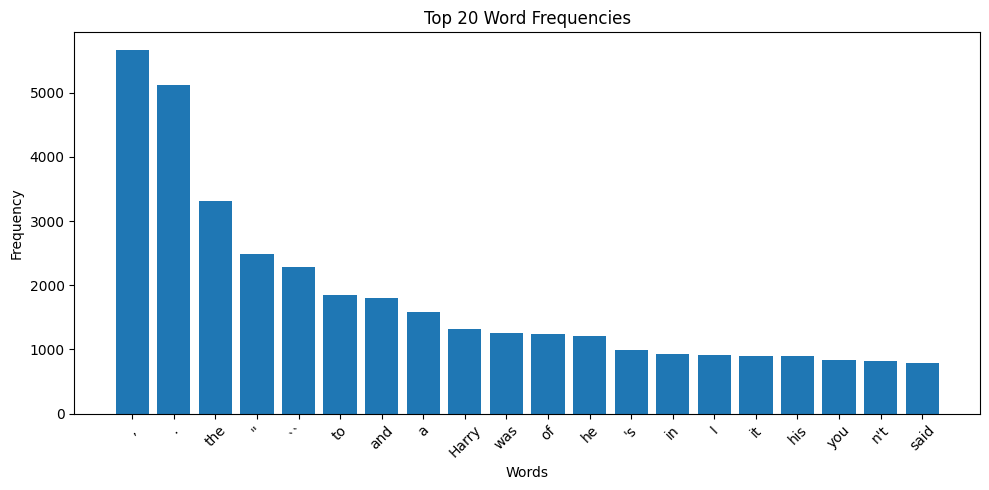

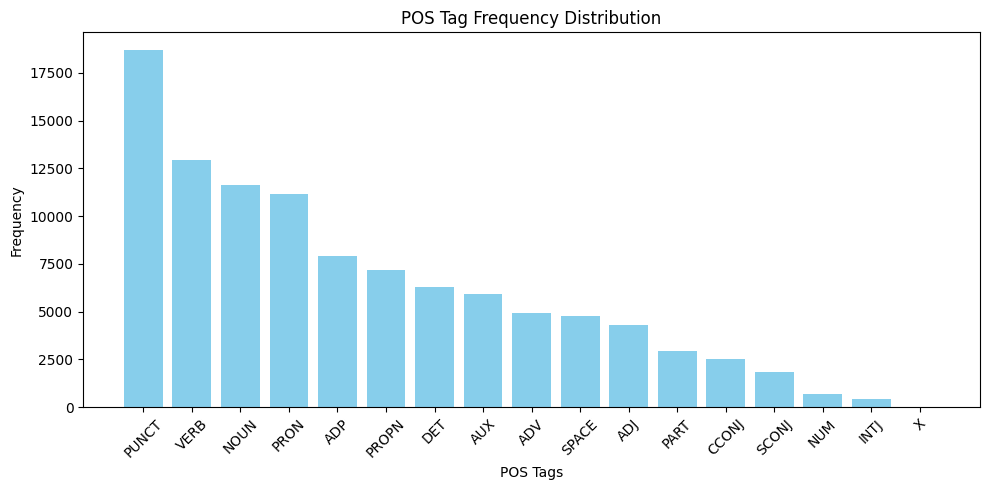

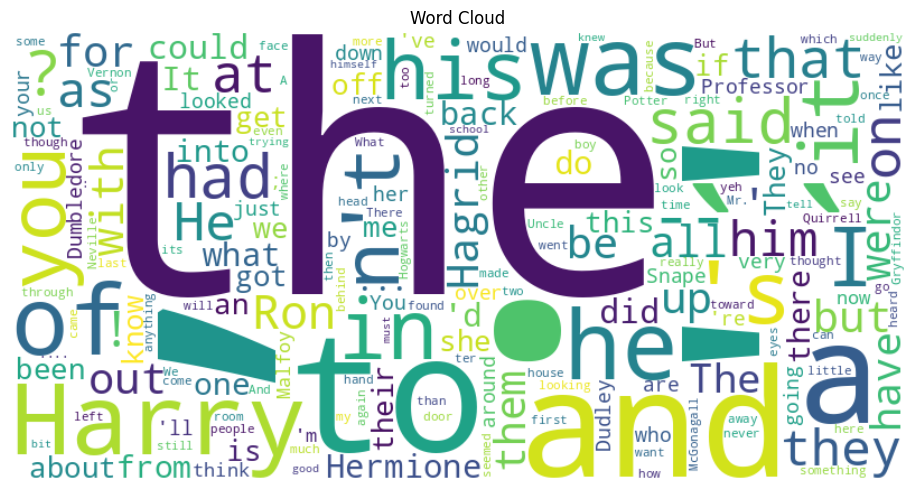

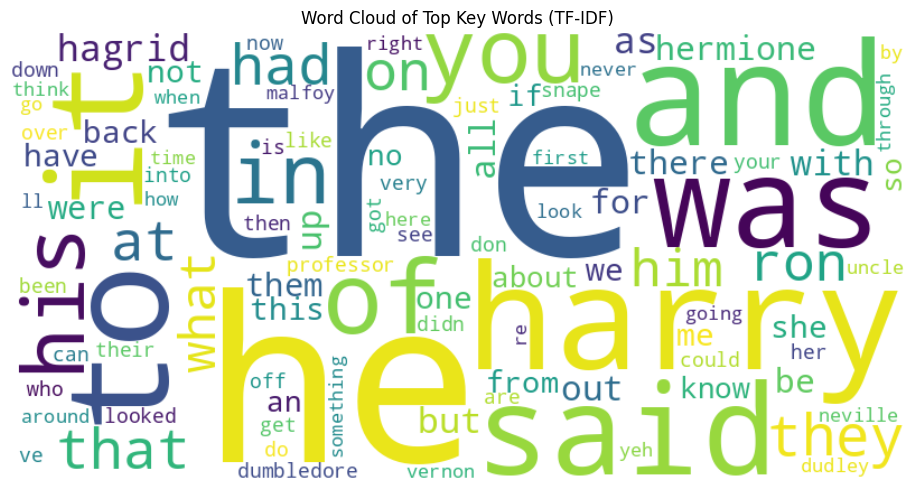

In [ ]:
# Гистограмма частотного распределения слов

word_counts = Counter(words)

plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Гистограмма частотного распределения частей речи

labels, values = zip(*pos_counts.most_common())

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title("POS Tag Frequency Distribution")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pos_tag_frequency_plot.png")
plt.show()

# Облако слов

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

# Облако ключевых слов

tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

word_tfidf_dict = {word: tfidf_scores[i] for i, word in enumerate(feature_names)}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Key Words (TF-IDF)")
plt.tight_layout()
plt.savefig("tfidf_word_cloud.png")
plt.show()

**Дополнительный шаг**: Гистограмма частотного распределения и облако слов без стоп-слов

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


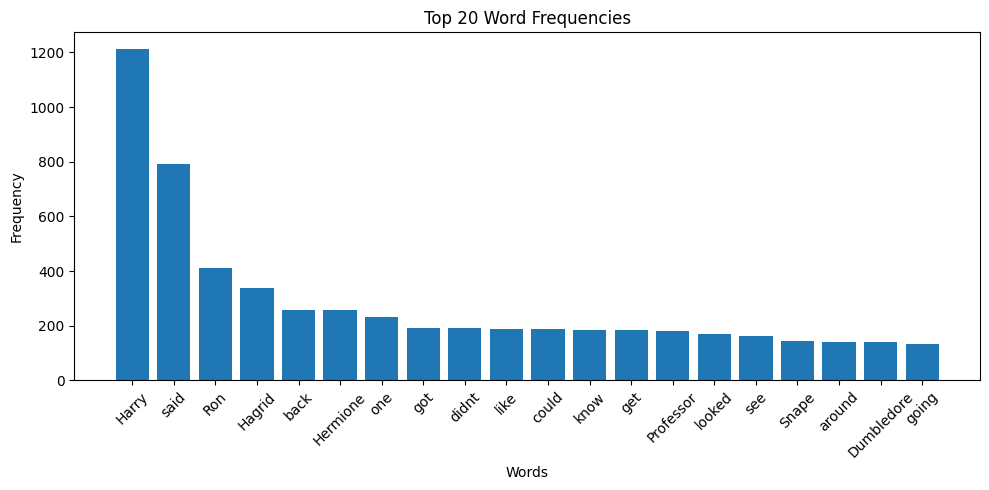

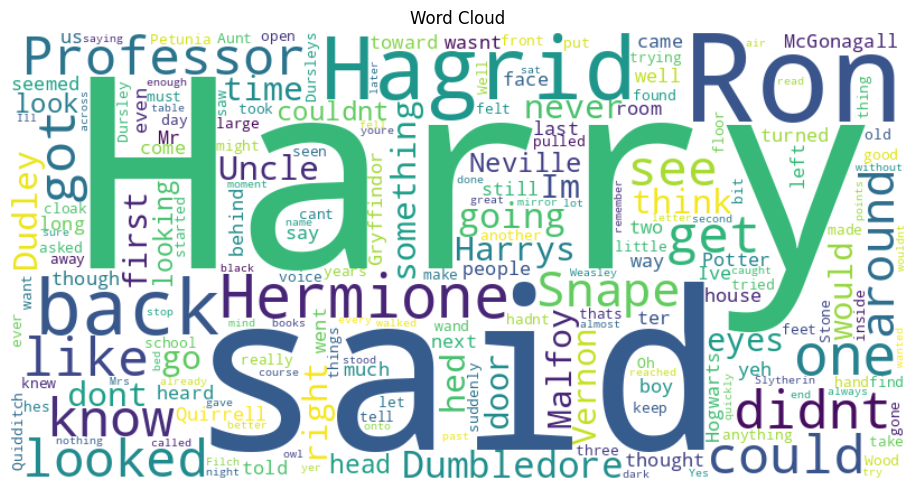

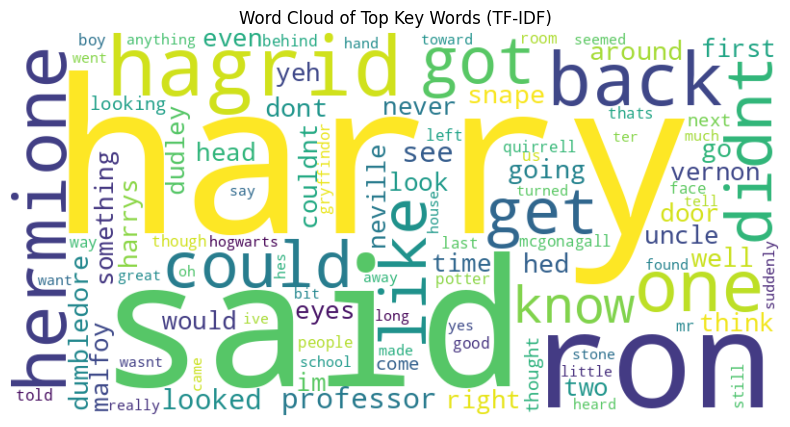

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Скачать список стоп-слов

# Получаем список стоп-слов
stop_words = set(stopwords.words('english'))

# Убираем все знаки препинания с помощью регулярного выражения
text_without_punctuation = re.sub(r'[^\w\s]', '', text)

# Разделяем текст на слова
words = text_without_punctuation.split()

# Оставляем только те слова, которые не являются стоп-словами
filtered_words = [word for word in words if word.lower() not in stop_words]

# Собираем текст обратно без стоп-слов
filtered_text = " ".join(filtered_words)

# Сегментация
sentences = nltk.sent_tokenize(filtered_text)
words = nltk.word_tokenize(filtered_text)
bigrams = list(ngrams(words, 2))

# Гистограмма для частотного распределения слов (без учета стоп-слов)
word_counts = Counter(words)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Облако слов (без учета стоп-слов)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.show()

# Облако ключевых слов (без учета стоп-слов)

# Создаем объект TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ограничиваем до 100 ключевых слов

# Преобразуем текст в матрицу TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform([filtered_text])

# Получаем слова с их соответствующими TF-IDF значениями
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Получаем сумму значений для каждого слова

# Создаем словарь для слов и их соответствующих TF-IDF значений
word_tfidf = dict(zip(feature_names, tfidf_scores))

# Генерируем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Отображаем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Key Words (TF-IDF)")
plt.show()

**Шаг 5**: отправляем на HF Datasets сегментированные данные и оформляем карточку

In [ ]:
!pip install datasets -q -U # загружаем библиотеку для работы с HF Datasets

In [ ]:
# Создаем датасет
from datasets import Dataset
dataset = Dataset.from_pandas(df)

dataset.push_to_hub("lamdary/task2_advanced", token="")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/lamdary/task2_advanced/commit/3808ed1ac76de7602de6c00bd62b5bbf8760306a', commit_message='Upload dataset', commit_description='', oid='3808ed1ac76de7602de6c00bd62b5bbf8760306a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/lamdary/task2_advanced', endpoint='https://huggingface.co', repo_type='dataset', repo_id='lamdary/task2_advanced'), pr_revision=None, pr_num=None)